<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

In [1]:
import pandas as pd
import sqlite3

In [2]:
!pip install ipython-sql

In [3]:
df = pd.read_csv("D:\\Users\\intel\\Downloads\\spacex.csv")

In [4]:
cnn = sqlite3.connect('EDA with SQL')

In [5]:
cnn

In [6]:
df.to_sql('spacex', cnn)

ValueError: Table 'spacex' already exists.

In [7]:
%reload_ext sql

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [8]:
pd.read_sql_query("SELECT DISTINCT Launch_Site FROM SPACEX",cnn)

,Launch_Site
0,CCAFS LC-40
1,VAFB SLC-4E
2,KSC LC-39A
3,CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 

In [9]:
pd.read_sql_query("SELECT * FROM SPACEX WHERE Launch_Site LIKE 'CCA%' LIMIT 5;",cnn)

,index,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,0,4/6/2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,1,8/12/2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2,5/22/2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,3,8/10/2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,4,1/3/2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [10]:
pd.read_sql("""SELECT SUM(Payload_Mass__KG_) as totalpayloadmass 
from spacex WHERE Customer = 'NASA (CRS)' """,cnn)

,totalpayloadmass
0,45596


### Task 4




##### Display average payload mass carried by booster version F9 v1.1

In [11]:
pd.read_sql("""SELECT AVG(Payload_Mass__KG_) as avgpayloadmass 
from spacex WHERE Booster_Version = 'F9 v1.1'""",cnn)

,avgpayloadmass
0,2928.4


### Task 5

##### List the date when the first successful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [ ]:
pd.read_sql("""SELECT MIN(Date) AS FIRSTSUCCESSFULL_LANDING 
FROM SPACEX WHERE Landing_Outcome = 'Success (ground pad)';""", cnn)

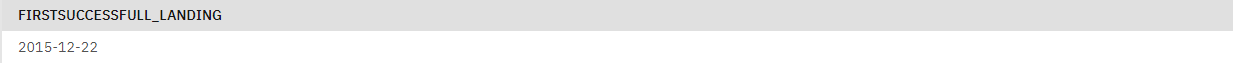

### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [13]:
pd.read_sql("""SELECT Booster_Version FROM SPACEX 
WHERE LANDING_OUTCOME = 'Success (drone ship)' 
AND PAYLOAD_MASS__KG_ BETWEEN 4000 and 6000""", cnn)

,Booster_Version
0,F9 FT B1022
1,F9 FT B1026
2,F9 FT B1021.2
3,F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [23]:
success = pd.read_sql("""SELECT COUNT(Mission_Outcome) AS SuccessCount 
FROM SPACEX WHERE Mission_Outcome like "%Success%"
;""", cnn)
failure = pd.read_sql("""SELECT COUNT(Mission_Outcome) AS FailureCount 
FROM SPACEX WHERE Mission_Outcome like "%failure%"
;""", cnn)

print(success)
print(failure)

   SuccessCount
0           100
   FailureCount
0             1


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [14]:
pd.read_sql("""SELECT Booster_Version, Payload_Mass__kg_ from SPACEX 
WHERE Payload_Mass__kg_ = (SELECT MAX(Payload_Mass__kg_) FROM SPACEX)""", cnn)

,Booster_Version,PAYLOAD_MASS__KG_
0,F9 B5 B1048.4,15600
1,F9 B5 B1049.4,15600
2,F9 B5 B1051.3,15600
3,F9 B5 B1056.4,15600
4,F9 B5 B1048.5,15600
5,F9 B5 B1051.4,15600
6,F9 B5 B1049.5,15600
7,F9 B5 B1060.2,15600
8,F9 B5 B1058.3,15600
9,F9 B5 B1051.6,15600


### Task 9


##### List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6, 2) as month to get the months and substr(Date,1,4)='2015' for year.**


In [24]:
pd.read_sql("""SELECT Booster_Version, Launch_Site, Landing_Outcome, Date 
            FROM SPACEX WHERE substr(DATE,1,4) = '2015' 
            AND substr(DATE,6,2) 
            AND Landing_Outcome = 'Failure (drone ship)';""", cnn)

,Booster_Version,Launch_Site,Landing_Outcome,Date


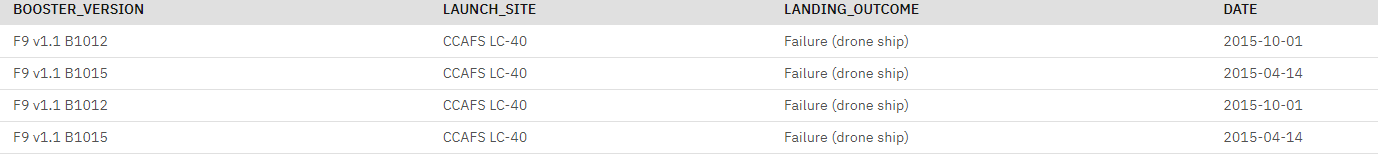

### Task 10

##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order
**Note: SQLLite does not support monthnames. So you need to use substr(Date,9,2) as date to get the date,  substr(Date, 6, 2) as month to get the months and substr(Date,1,4)='2015' for year.You need to use string format for date as '20100604' and '20170320'**


In [33]:
pd.read_sql('''SELECT Landing_Outcome, COUNT(Landing_Outcome) AS TOTALCOUNT FROM SPACEX
 WHERE DATE BETWEEN '2010-06-04'AND '2017-03-20' 
 GROUP BY Landing_Outcome
ORDER BY TOTALCOUNT DESC;''', cnn)


,Landing_Outcome,TOTALCOUNT


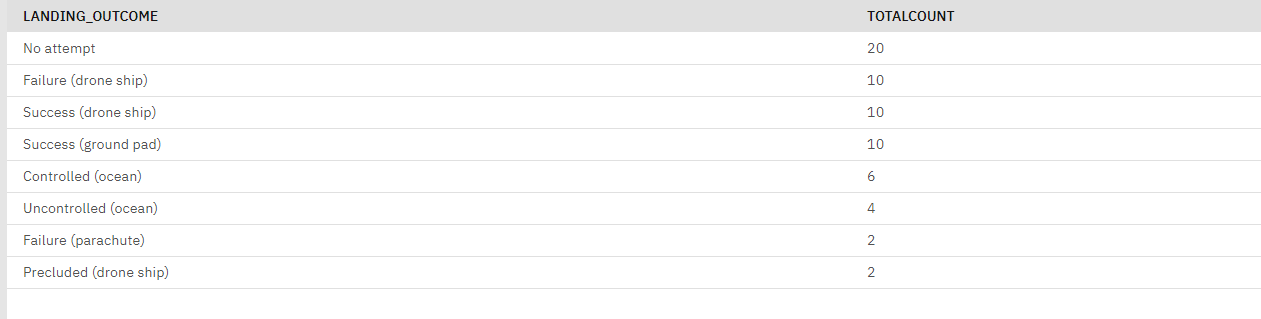